<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/csv/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [ ]:
my_data= "data"

In [ ]:
os.listdir(my_data) 

['test', 'train', 'validation']

In [ ]:
test= my_data + '/test/'
validation= my_data + '/validation/'
train = my_data+ '/train/'

In [ ]:
os.listdir(train)

['dog', 'cat']

In [ ]:
os.listdir(train + 'dog')

['dog.11798.jpg',
 'dog.10126.jpg',
 'dog.2015.jpg',
 '2636.jpg',
 'dog.253.jpg',
 'dog.10906.jpg',
 'dog.2216.jpg',
 'dog.1877.jpg',
 'dog.1358.jpg',
 '2506.jpg',
 'dog.1954.jpg',
 'dog.157.jpg',
 'dog.11920.jpg',
 'dog.11412.jpg',
 'dog.11887.jpg',
 'dog.2699.jpg',
 'dog.2035.jpg',
 'dog.10955.jpg',
 'dog.10007.jpg',
 'dog.10034.jpg',
 'dog.1103.jpg',
 'dog.10063.jpg',
 'dog.11113.jpg',
 '2577.jpg',
 'dog.2288.jpg',
 'dog.10340.jpg',
 'dog.11677.jpg',
 'dog.12273.jpg',
 'dog.2339.jpg',
 'dog.11269.jpg',
 'dog.10186.jpg',
 'dog.12109.jpg',
 'dog.10845.jpg',
 'dog.10554.jpg',
 'dog.1495.jpg',
 'dog.11145.jpg',
 'dog.12090.jpg',
 'dog.1450.jpg',
 'dog.2203.jpg',
 'dog.12342.jpg',
 'dog.2251.jpg',
 'dog.1610.jpg',
 'dog.2350.jpg',
 'dog.1319.jpg',
 'dog.1865.jpg',
 'dog.221.jpg',
 'dog.2254.jpg',
 'dog.1474.jpg',
 'dog.2278.jpg',
 '2600.jpg',
 'dog.10065.jpg',
 'dog.11241.jpg',
 'dog.2234.jpg',
 'dog.11179.jpg',
 'dog.10255.jpg',
 'dog.267.jpg',
 'dog.10200.jpg',
 'dog.10939.jpg',
 'dog.

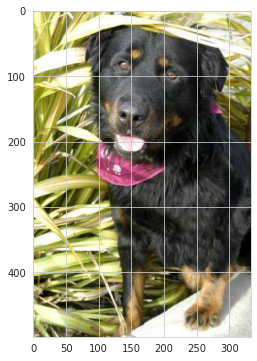

In [ ]:
plt.imshow(imread(train+'dog'+'/dog.10662.jpg'))

In [ ]:
os.listdir(train + 'cat')

['cat.4291.jpg',
 'cat.6404.jpg',
 'cat.9874.jpg',
 'cat.2923.jpg',
 'cat.6016.jpg',
 'cat.1560.jpg',
 'cat.8725.jpg',
 'cat.1883.jpg',
 'cat.12005.jpg',
 'cat.236.jpg',
 'cat.2720.jpg',
 'cat.12467.jpg',
 'cat.10517.jpg',
 'cat.10481.jpg',
 'cat.6717.jpg',
 'cat.8470.jpg',
 'cat.4805.jpg',
 'cat.12336.jpg',
 'cat.7935.jpg',
 'cat.3914.jpg',
 'cat.11688.jpg',
 'cat.11925.jpg',
 'cat.11795.jpg',
 'cat.4081.jpg',
 'cat.3155.jpg',
 'cat.8689.jpg',
 'cat.6167.jpg',
 'cat.7167.jpg',
 'cat.2478.jpg',
 'cat.11186.jpg',
 'cat.8784.jpg',
 'cat.8406.jpg',
 'cat.6597.jpg',
 'cat.6185.jpg',
 'cat.2261.jpg',
 'cat.11246.jpg',
 'cat.5780.jpg',
 'cat.4001.jpg',
 'cat.10464.jpg',
 'cat.9349.jpg',
 'cat.4313.jpg',
 'cat.12232.jpg',
 'cat.8863.jpg',
 'cat.7984.jpg',
 'cat.5137.jpg',
 'cat.11308.jpg',
 'cat.34.jpg',
 'cat.8741.jpg',
 'cat.926.jpg',
 'cat.4590.jpg',
 'cat.5443.jpg',
 'cat.2795.jpg',
 'cat.5437.jpg',
 'cat.3759.jpg',
 'cat.6066.jpg',
 'cat.7249.jpg',
 'cat.11389.jpg',
 'cat.9452.jpg',
 'ca

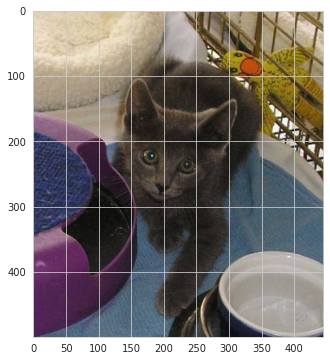

In [ ]:
plt.imshow(imread(train+'cat'+'/cat.767.jpg'))

**Let's check how many images there are.**

**Let's take an example images from both train-cat and train-dog folders to observe process** 

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

## Scalling

**Let's check the images if they are needed to be scaled or not**

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

# Modelling

# Evaluation on Test Data

# Prediction

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>